Note that the ElemStatLearn package has been archived. First have to download the archive from 

    https://cran.r-project.org/src/contrib/Archive/ElemStatLearn/


Then in R Studio, go to Tools, Install Packages, in the popup box select Package Archive and Browse were the .tar.gz file has been downloaded
In R, install the .tar.gz as a local source package

In [4]:
library(ElemStatLearn)
library(leaps)
data(prostate)

# Exploratory Data Analayis

In [5]:
head(prostate)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<lgl>
1,-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829,TRUE
2,-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
3,-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189,TRUE
4,-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
5,0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636,TRUE
6,-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678,TRUE


In [6]:
str(prostate )

'data.frame':	97 obs. of  10 variables:
 $ lcavol : num  -0.58 -0.994 -0.511 -1.204 0.751 ...
 $ lweight: num  2.77 3.32 2.69 3.28 3.43 ...
 $ age    : int  50 58 74 58 62 50 64 58 47 63 ...
 $ lbph   : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ svi    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lcp    : num  -1.39 -1.39 -1.39 -1.39 -1.39 ...
 $ gleason: int  6 6 7 6 6 6 6 6 6 6 ...
 $ pgg45  : int  0 0 20 0 0 0 0 0 0 0 ...
 $ lpsa   : num  -0.431 -0.163 -0.163 -0.163 0.372 ...
 $ train  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...


In [8]:
summary(prostate)

     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.629   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.876   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :4.780   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1787   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa           train        

In [7]:
cor(prostate[,1:8] )

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.0000000,0.2805214,0.2249999,0.027349703,0.53884500,0.675310484,0.43241706,0.43365225
lweight,0.2805214,1.0000000,0.3479691,0.442264395,0.15538491,0.164537146,0.05688210,0.10735379
age,0.2249999,0.3479691,1.0000000,0.350185896,0.11765804,0.127667752,0.26889160,0.27611245
lbph,0.0273497,0.4422644,0.3501859,1.000000000,-0.08584324,-0.006999431,0.07782045,0.07846002
svi,0.5388450,0.1553849,0.1176580,-0.085843238,1.00000000,0.673111185,0.32041222,0.45764762
lcp,0.6753105,0.1645371,0.1276678,-0.006999431,0.67311118,1.000000000,0.51483006,0.63152825
gleason,0.4324171,0.0568821,0.2688916,0.077820447,0.32041222,0.514830063,1.00000000,0.75190451
pgg45,0.4336522,0.1073538,0.2761124,0.078460018,0.45764762,0.631528246,0.75190451,1.00000000


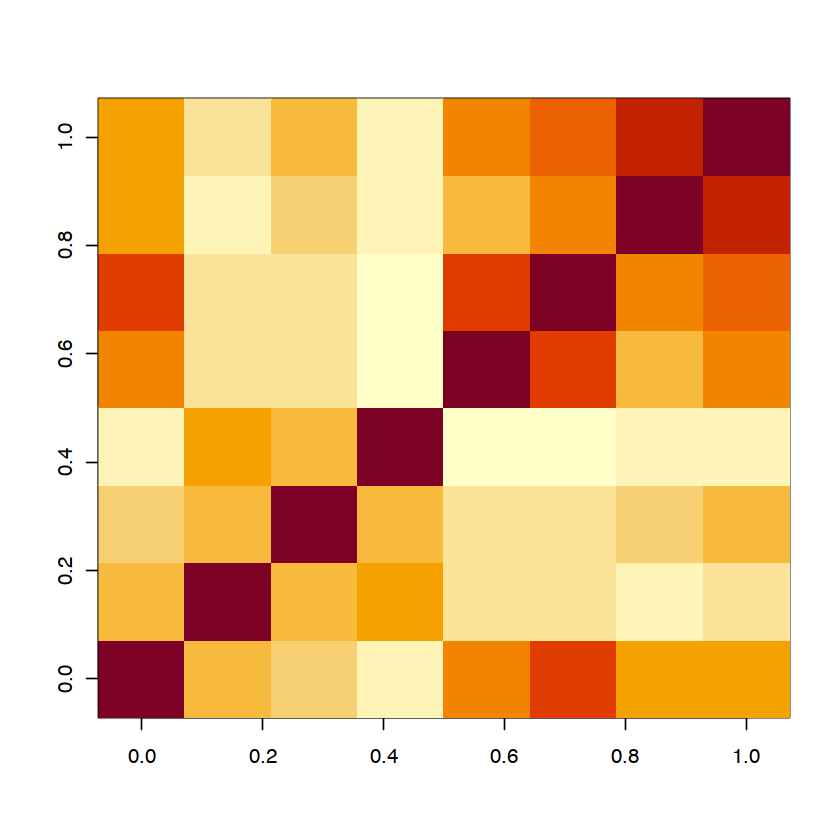

In [10]:
image(cor(prostate[,1:8] ))

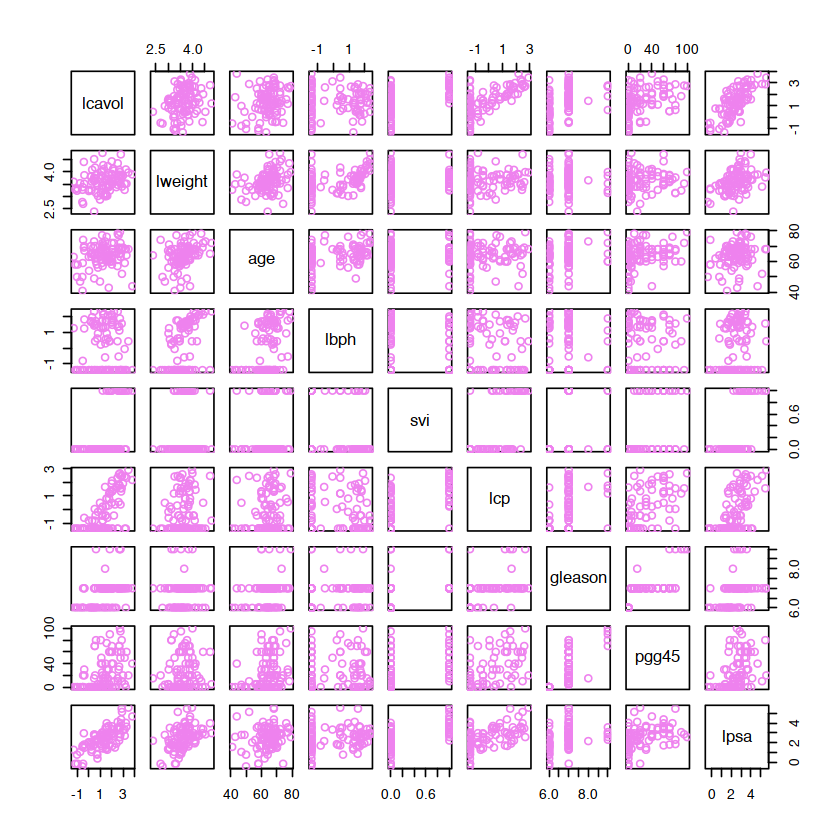

In [9]:
pairs(prostate[,1:9], col="violet")

In [12]:
train <- subset( prostate, train==TRUE )[,1:9]
test  <- subset( prostate, train==FALSE )[,1:9]

# Simple Linear Regression

In [13]:
mod1.lm <- lm(lpsa ~ lcavol, data=prostate)

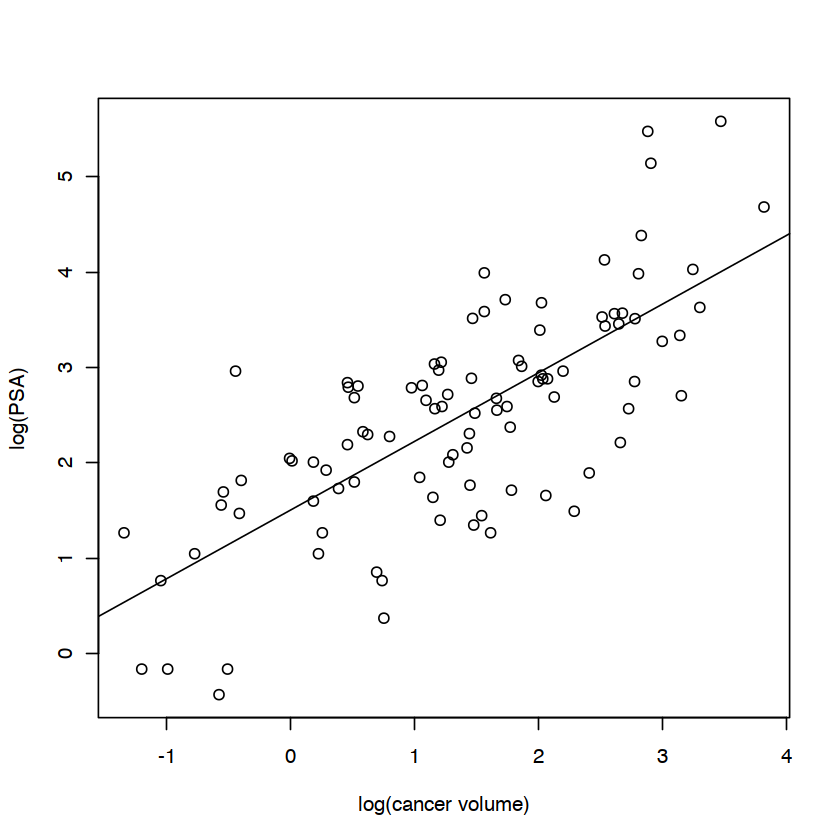

In [15]:
plot(x=prostate$lcavol, y=prostate$lpsa, xlab="log(cancer volume)", ylab="log(PSA)")
abline(coef=coef(mod1.lm))

In [16]:
summary(mod1.lm)


Call:
lm(formula = lpsa ~ lcavol, data = prostate)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67624 -0.41648  0.09859  0.50709  1.89672 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.50730    0.12194   12.36   <2e-16 ***
lcavol       0.71932    0.06819   10.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7875 on 95 degrees of freedom
Multiple R-squared:  0.5394,	Adjusted R-squared:  0.5346 
F-statistic: 111.3 on 1 and 95 DF,  p-value: < 2.2e-16


In [17]:
confint(mod1.lm)

,2.5 %,97.5 %
(Intercept),1.2652222,1.7493727
lcavol,0.5839404,0.8547004


# Multiple Linear Regression

In [18]:
mod2.lm <- lm(lpsa ~ ., data=train)
summary(mod2.lm)


Call:
lm(formula = lpsa ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.64870 -0.34147 -0.05424  0.44941  1.48675 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.429170   1.553588   0.276  0.78334    
lcavol       0.576543   0.107438   5.366 1.47e-06 ***
lweight      0.614020   0.223216   2.751  0.00792 ** 
age         -0.019001   0.013612  -1.396  0.16806    
lbph         0.144848   0.070457   2.056  0.04431 *  
svi          0.737209   0.298555   2.469  0.01651 *  
lcp         -0.206324   0.110516  -1.867  0.06697 .  
gleason     -0.029503   0.201136  -0.147  0.88389    
pgg45        0.009465   0.005447   1.738  0.08755 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7123 on 58 degrees of freedom
Multiple R-squared:  0.6944,	Adjusted R-squared:  0.6522 
F-statistic: 16.47 on 8 and 58 DF,  p-value: 2.042e-12
